In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import scipy.io
from sklearn.utils import resample


In [2]:
mat_file= scipy.io.loadmat('LOSS.mat')
mat_file_pay = scipy.io.loadmat('PAY.mat')

np_array = np.array(mat_file['LOSS'])
df6 = pd.DataFrame(np_array)
df6.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']
df6.insert(len(df6.columns),'Loss', 1)
df6.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


In [3]:
df7 = pd.DataFrame(np.array(mat_file_pay['PAY']))
df7.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']
df7.insert(len(df7.columns),'Loss', 0)
df7.head()

df7_downsampled = resample(df7, replace=False, n_samples=df6.shape[0], random_state=123)

In [4]:
data_clean = pd.concat([df6,df7], ignore_index = True)
print(data_clean)

            NOI    DSCR      LTV     Balance  Rate     Fee  Net Mortgage Rate  \
0      697399.0  1.3500  69.4000  7250000.00  5.25  0.0312             5.2188   
1     1088638.0  1.3600  61.3000  9100000.00  5.52  0.0312             5.4888   
2      618081.0  1.3100  66.0000  6650000.00  5.45  0.0312             5.4188   
3      260695.0  1.5500  64.2000  2600000.00  5.21  0.1112             5.0988   
4      607133.0  1.2600  65.8000  6500000.00  5.29  0.0312             5.2588   
...         ...     ...      ...         ...   ...     ...                ...   
4788   156294.0  1.4442  54.1815  1029447.80  7.40  0.0624             7.3376   
4789   172837.0  1.3260  61.6591  1257845.64  7.40  0.0624             7.3376   
4790   104557.0  1.2949  67.2535   823855.65  7.50  0.0624             7.4376   
4791   737888.0  1.3268  73.3318  5679548.69  8.28  0.0624             8.2176   
4792   482735.0  1.2779  72.5958  3629791.06  8.35  0.0624             8.2876   

      Year Built  Occupancy

In [6]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
dataclean = pd.DataFrame(normalize(data_clean))
dataclean.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
0,0.020436,0.016397,0.815897,0.024381,0.229508,0.104874,0.555316,0.953368,1.000000,0.204197,0.525632,0.573800,0.571973,0.262580,0.015077,0.013145,0.047619,1.0
1,0.032584,0.016861,0.720670,0.030998,0.278689,0.104874,0.584045,0.880829,0.953535,0.206093,0.614106,0.661633,0.578654,0.262580,0.034106,0.026155,0.200000,1.0
2,0.017973,0.014541,0.775925,0.022234,0.265938,0.104874,0.576597,0.968912,0.870707,0.290712,0.501395,0.528142,0.570863,0.309777,0.011418,0.010153,0.019048,1.0
3,0.006876,0.025677,0.754764,0.007748,0.222222,0.373782,0.542547,0.782383,1.000000,0.289557,0.535007,0.575446,0.611808,0.279322,0.012176,0.007781,0.380952,1.0
4,0.017633,0.012221,0.773574,0.021698,0.236794,0.104874,0.559572,0.808290,1.000000,0.114144,0.505039,0.545695,0.605336,0.279322,0.029961,0.020911,0.038095,1.0


In [8]:

data_clean.corr()


,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
NOI,1.000000,0.122950,-0.015557,0.904979,-0.092564,-0.099187,-0.088382,-0.004661,-0.097906,-0.099355,-0.039261,-0.031610,-0.013732,-0.028327,0.941002,0.938568,-0.025669,-0.033794
DSCR,0.122950,1.000000,-0.400696,0.038571,-0.158859,-0.006513,-0.158908,-0.057814,-0.055856,-0.027073,0.062389,0.099111,0.028159,-0.132254,0.142474,0.162486,0.022581,-0.094803
LTV,-0.015557,-0.400696,1.000000,0.088660,0.072736,0.007184,0.074860,0.106693,0.035194,-0.018046,-0.037836,-0.072655,0.022562,0.125718,-0.018622,-0.033788,-0.051427,0.185997
Balance,0.904979,0.038571,0.088660,1.000000,-0.134484,-0.141188,-0.128766,-0.004555,-0.082617,-0.078491,-0.181428,-0.172316,-0.058362,-0.035737,0.842617,0.872621,-0.037524,-0.016545
Rate,-0.092564,-0.158859,0.072736,-0.134484,1.000000,0.265024,0.993967,-0.052757,0.016078,-0.027228,0.356323,0.143955,0.030534,0.775484,-0.087840,-0.111365,-0.041804,0.045590
Fee,-0.099187,-0.006513,0.007184,-0.141188,0.265024,1.000000,0.230023,0.022689,0.063613,-0.007794,0.264194,0.228534,-0.025352,0.133246,-0.085985,-0.085975,-0.002223,-0.020853
Net Mortgage Rate,-0.088382,-0.158908,0.074860,-0.128766,0.993967,0.230023,1.000000,-0.050146,0.014589,-0.025839,0.347239,0.135462,0.030513,0.773203,-0.084010,-0.107677,-0.040708,0.047168
Year Built,-0.004661,-0.057814,0.106693,-0.004555,-0.052757,0.022689,-0.050146,1.000000,-0.033207,0.086123,-0.028604,-0.018969,0.033025,-0.035368,-0.000924,-0.009677,-0.287432,0.010995
Occupancy,-0.097906,-0.055856,0.035194,-0.082617,0.016078,0.063613,0.014589,-0.033207,1.000000,0.071285,-0.074684,-0.095288,-0.083508,0.073618,-0.163542,-0.102381,0.072179,-0.045576
ZipPop,-0.099355,-0.027073,-0.018046,-0.078491,-0.027228,-0.007794,-0.025839,0.086123,0.071285,1.000000,-0.088917,-0.087453,0.005195,-0.006626,-0.097969,-0.088293,0.047940,-0.020596


<AxesSubplot:>

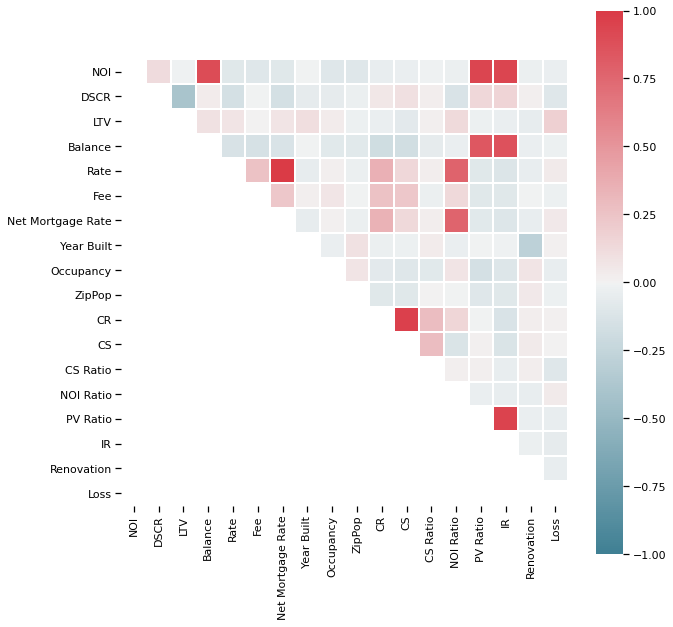

In [9]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)



#WE SHOULD DROP VARIABLES WITH HIGH CORRELATION
#df = df.drop(columns = ['',...])

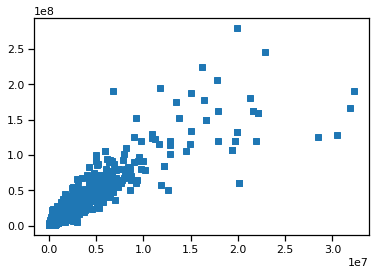

In [10]:
plt.plot(data_clean['NOI'],data_clean['Balance'],'s')

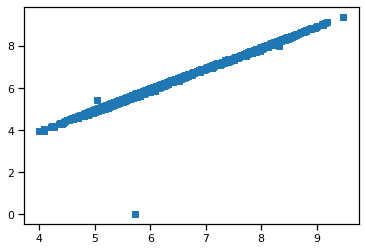

In [11]:
plt.plot(data_clean['Rate'],data_clean['Net Mortgage Rate'],'s')

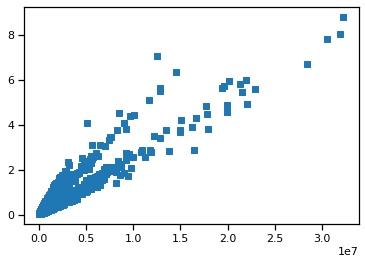

In [12]:
plt.plot(data_clean['NOI'],data_clean['PV Ratio'],'s')

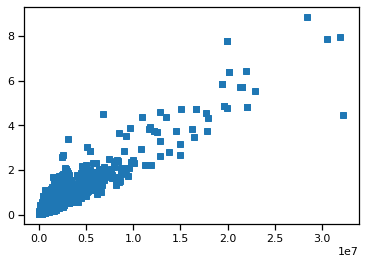

In [13]:
plt.plot(data_clean['NOI'],data_clean['IR'],'s')

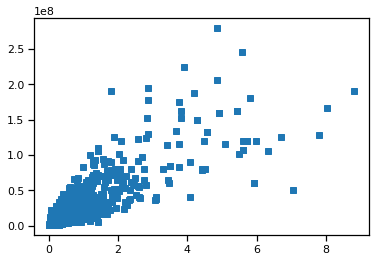

In [14]:
plt.plot(data_clean['PV Ratio'],data_clean['Balance'],'s')

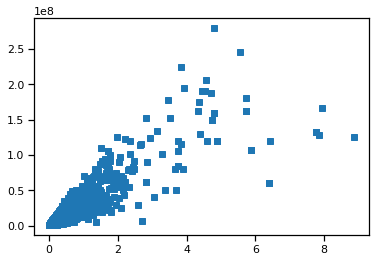

In [15]:
plt.plot(data_clean['IR'],data_clean['Balance'],'s')

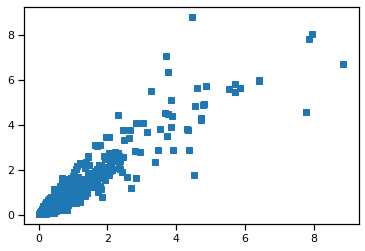

In [16]:
plt.plot(data_clean['IR'],data_clean['PV Ratio'],'s')

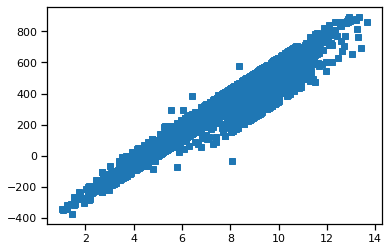

In [17]:
plt.plot(data_clean['CR'],data_clean['CS'],'s')

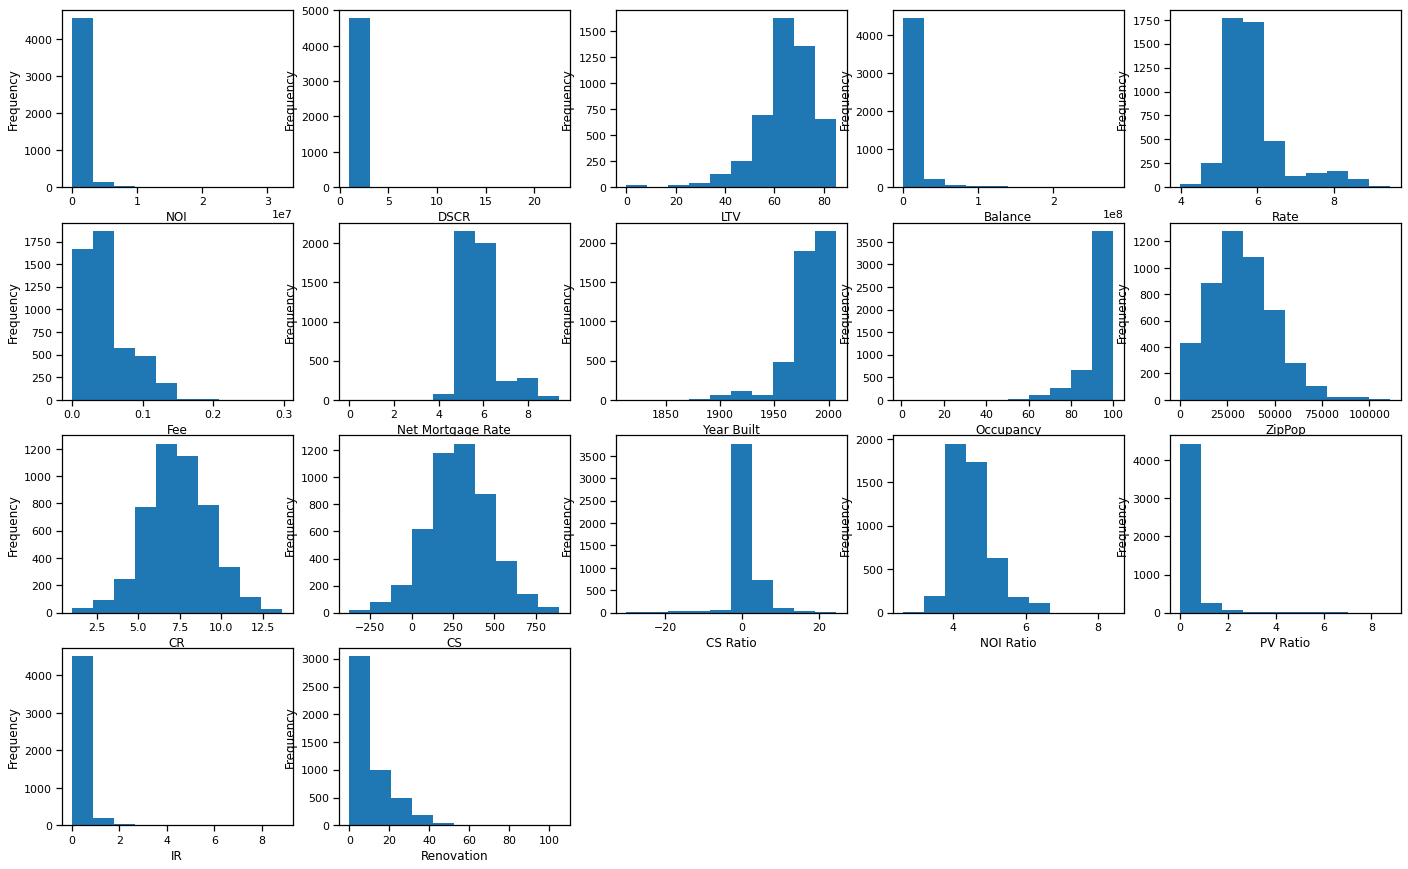

In [18]:
numeric_vars = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']

# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(4, 5, i+1)
    sub.set_xlabel(var)
    data_clean[var].plot(kind = 'hist')

In [19]:

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

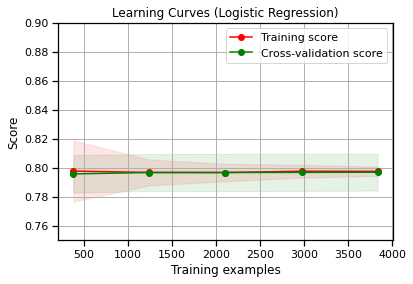

In [20]:
X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()


In [21]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [22]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42) #just for bootstrapping

In [24]:
#Recursive Feature Elimination

from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 4)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

AttributeError: 'str' object has no attribute 'decode'

In [25]:
#Principal Component Analysis

from sklearn.decomposition import PCA 
pca = PCA(n_components=4, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [9.97625643e-01 2.37356255e-03 7.93947370e-07 9.13285806e-11]


In [26]:
X_train_features = X_train.loc[:,rfe.support_]
X_test_features = X_test.loc[:,rfe.support_]
data_clean_features = data_clean.loc[:,np.append(rfe.support_,True)]
print(X_train_features.shape)
print(X_test_features.shape)

AttributeError: 'RFE' object has no attribute 'support_'

In [ ]:
# RANDOM FOREST WITH RANDOMIZED SEARCH

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)
results = rand.cv_results_
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

In [150]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=4,random_state=0 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.7893639207507821


In [151]:
print(randomForest.feature_importances_)
print(len(maxFeatures))


[0.05412151 0.06999718 0.0891129  0.05529588 0.0584129  0.05785534
 0.06140254 0.04893521 0.0448192  0.05773319 0.05829723 0.05720542
 0.07726743 0.05201539 0.05441858 0.05927968 0.04383039]
16


Text(0, 0.5, 'Normalized Gini Importance')

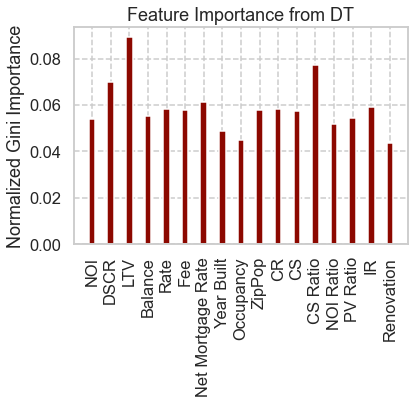

In [152]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(maxFeatures)+1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

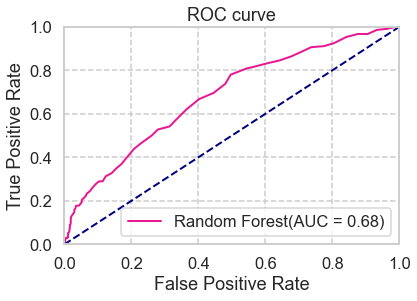

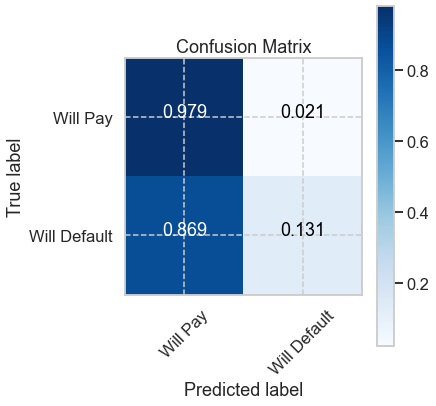

In [153]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

In [154]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result for result in grid.cv_results_['mean_test_score']]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.7982467814892137
LogisticRegression(C=0.01, random_state=0)


Logistic regression accuracy is  0.7789363920750783


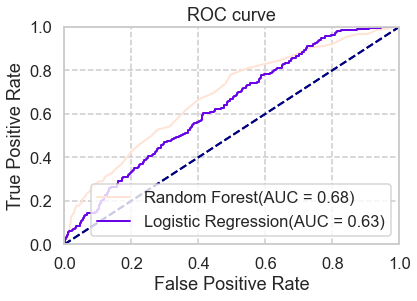

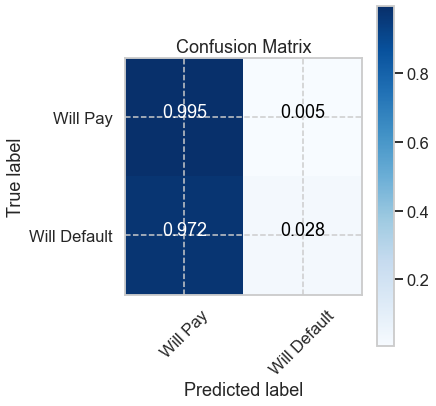

In [155]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()


In [156]:
from sklearn.metrics import classification_report

print("RF",classification_report(y_test, rfPredict, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))


RF               precision    recall  f1-score   support

           0       0.80      0.98      0.88       745
           1       0.64      0.13      0.22       214

    accuracy                           0.79       959
   macro avg       0.72      0.55      0.55       959
weighted avg       0.76      0.79      0.73       959

LR               precision    recall  f1-score   support

           0       0.78      0.99      0.87       745
           1       0.60      0.03      0.05       214

    accuracy                           0.78       959
   macro avg       0.69      0.51      0.46       959
weighted avg       0.74      0.78      0.69       959



In [124]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
x_columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Renovation','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR']
y = data_clean["Loss"]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(data_clean[x_columns], y)
selector.support_

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False,  True,  True])